--- 0.07103228569030762 seconds ---
--- 0.003000020980834961 seconds ---
--- 0.0009710788726806641 seconds ---


<IPython.core.display.Javascript object>


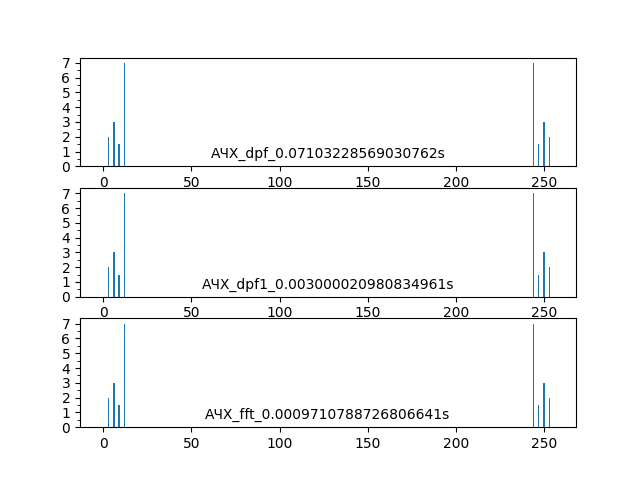

<IPython.core.display.Javascript object>


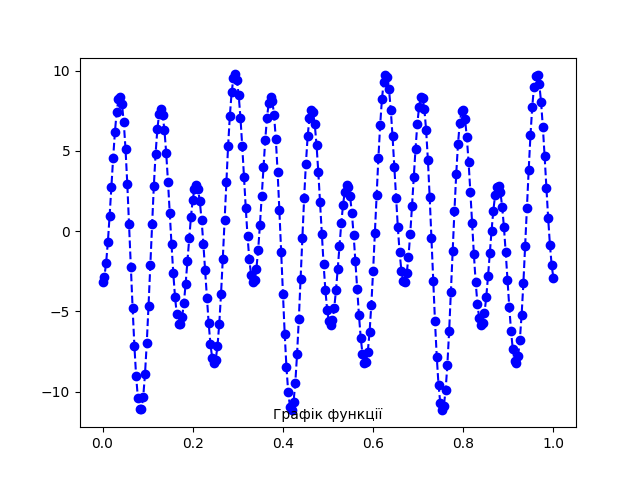

In [ ]:
# ПОРІВНЯННЯ АЛГОРИТМІВ
# import math
from math import e, pi, sin, cos
import time
# псевдонім
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.fftpack import fft
import sys

def W(N, l):
    m = (-pi*l/N)*2j
    return e ** (m)

def dpf(x):
    N=len(x)
    S=[]
    for i in range(N):
        Sn=0
        for k in range(N):
            Sn=Sn + x[k]*W(N, k*i)
        S.append(Sn)
    return S

def dpf1(ff):
    N = len(ff)
    if N <= 1:
        return ff
    fp = dpf1(ff[0::2])
    fnp = dpf1(ff[1::2])
    NP = [W(N, k) * fnp[k] for k in range(N // 2)]
    Cn = [fp[k] + NP[k] for k in range(N // 2)] + [fp[k] - NP[k] for k in range(N // 2)]
    return Cn

#тривалість "сигналу" 1с

f = []
#v - частота основного тону в Гц; Кількість періодів функції f (v*1c); 
v = 3
#Z - кількість значень на відрізку v*1c
Z = 256

# досліджувана функція
for i in range(Z):
    #dr=v*1c/Z, r=i*dr - частина періоду, що минула від початку коливань
    r = i * v / Z      
    f.append(2*sin(2*pi*r+8)+3*cos(4*pi*r-100)+1.5*sin(6*pi*r+100)-7*cos(8*pi*r))
    #f(t)=2sin(2π(1ν)t+8)+3cos(2π(2ν)t-100)+1.5sin(2π(3ν)t+100)-7cos(2π(4ν)t)

#поточна глибина рекурсії
# print(sys.getrecursionlimit())
# sys.setrecursion(5000)
# sys.setrecursionlimit(10000)
    
start = time.time()
y_1=dpf(f)
end = time.time()
t_1=end - start
print("--- %s seconds ---" % t_1)

start = time.time()
y_2=dpf1(f)
end = time.time()
t_2=end - start
print("--- %s seconds ---" % t_2)

start = time.time()
y_3=fft(f)
end = time.time()
t_3=end - start
print("--- %s seconds ---" % t_3)

L1=len(y_1)
L2=len(y_2)
L3=len(y_3)

#y[i] - амплітуда і-ї частоти ("мода")
y1=[]
y2=[]
y3=[]

for i in range(L1):
    y1.append(abs(y_1[i])/(L1/2))
for i in range(L2):
    y2.append(abs(y_2[i])/(L2/2))
for i in range(L3):
    y3.append(abs(y_3[i])/(L3/2))
    
#осі частот, відповідно до кількості вхідних значень; Vi=i/1с
x1 = np.linspace(0, L1 - 1, L1)
x2 = np.linspace(0, L2 - 1, L2)
x3 = np.linspace(0, L3 - 1, L3)

#вісь часу
x4 = np.linspace(0, 1, Z)

%matplotlib notebook
# figure - вікно, рисунок на якому будуть графіки
# axes - сам графік, система координат
fig = plt.figure()
# розкреслюємо рисунок на 3 частини
# вставляємо графік в першу комірку
ax1 = fig.add_subplot(3, 1, 1)
# вставляємо графік в другу комірку
ax2 = fig.add_subplot(3, 1, 2)
# вставляємо графік в третю комірку
ax3 = fig.add_subplot(3, 1, 3)


ax1.set_title(r'АЧХ_dpf_'+str(t_1)+'s', fontsize=10, x=0.5, y=0)
# Встановлюємо інтервал основних поділок
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
# Встановлюємо інтервал допоміжних поділок
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax1.bar(x1, y1)

ax2.set_title(r'АЧХ_dpf1_'+str(t_2)+'s', fontsize=10, x=0.5, y=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax2.bar(x2, y2)

ax3.set_title(r'АЧХ_fft_'+str(t_3)+'s', fontsize=10, x=0.5, y=0)
ax3.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax3.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax3.bar(x3, y3)
fig.savefig('saved_figure_2_1.png', dpi = 1000)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title(r'Графік функції', fontsize=10, x=0.5, y=0)
ax.plot(x4, f, color='blue', marker='o', linestyle='--')
fig.savefig('saved_figure_2_2.png', dpi = 1000)

